In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [5]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [6]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [8]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)

In [11]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [13]:
from utils import plot_decision_regions
import matplotlib.pyplot as plt

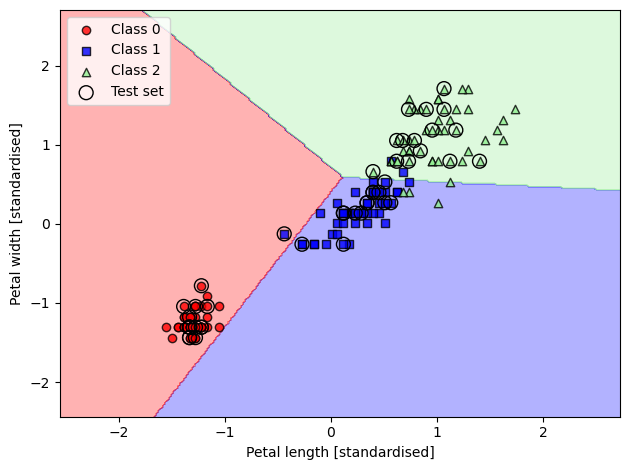

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()